In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# 1. Access the data

The data can be accessed from Johns Hopskins Github repository that can be accessed [here](https://github.com/CSSEGISandData/COVID-19). 
This data is automatically updated every 24 hours and therefore is more reliable

The data is an aggregate collected from the following data sources: 

|Source| Link to source |
|------|----------------|
|World Health Organization (WHO)| https://www.who.int/ |
|DXY.cn. Pneumonia | http://3g.dxy.cn/newh5/view/pneumonia |
|BNO News | https://bnonews.com/index.php/2020/02/the-latest-coronavirus-cases/ |
|National Health Commission of the People’s Republic of China (NHC)|http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml |
|China CDC (CCDC)| http://weekly.chinacdc.cn/news/TrackingtheEpidemic.html |
|Hong Kong Department of Health| https://www.chp.gov.hk/en/features/102465.html |
|Macau Government| https://www.ssm.gov.mo/portal/ |
|Taiwan CDC| https://sites.google.com/cdc.gov.tw/2019ncov/taiwan?authuser=0 |
|US CDC | https://www.cdc.gov/coronavirus/2019-ncov/index.html |
|Government of Canada | https://www.canada.ca/en/public-health/services/diseases/coronavirus.html |
|Australia Government Department of Health| https://www.health.gov.au/news/coronavirus-update-at-a-glance |
|European Centre for Disease Prevention and Control (ECDC)| https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases |
|Ministry of Health Singapore (MOH)| https://www.moh.gov.sg/covid-19 |
|Italy Ministry of Health| http://www.salute.gov.it/nuovocoronavirus |
|1Point3Arces| https://coronavirus.1point3acres.com/en |
|WorldoMeters| https://www.worldometers.info/coronavirus/ |

In [2]:
# When you access the Github profile, this data can be accessed under: csse_covid_19_data

death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')


# 2. Explore and understand the data

I wanted to explore the data for two reasons: 

* I wanted to understand what data cleaning is needed and what inconsistencies are in the data. 
* I wanted to know what each csv contains and how the data in the csvs is related

! [image](http://localhost:8888/view/Desktop/My%20Data%20exploration%20experiments/Covid-19/Screenshot%202020-04-09%20at%2010.49.27.png)

Before we start, we have to change the table headings to ensure that they are easily readable and usable by introducing a bit of uniformity. Therefore I will: 
* Make sure everything is in lower case
* Rename some columns such as 'Province/State' and 'Country/Region'

In [3]:
# renaming the df column names to lowercase
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

# changing province/state to state and country/region to country
confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})

Let's have a summary look at the data. 

In [4]:
#Checking for consistency in these datasets

print('The country cases shape:', country_df.shape)
print('Recovered cases shape: ', recovered_df.shape)
print('Confirmed cases shape: ', confirmed_df.shape)
print('Death cases shape: ', death_df.shape)

The country cases shape: (185, 14)
Recovered cases shape:  (264, 102)
Confirmed cases shape:  (264, 102)
Death cases shape:  (264, 102)


From this data, it is apparent that some data is missing in some instances and in others, too much. Given that the world has 195 countries (There are 195 countries in the world, 193 of which are members of the United Nations), we will break down and count the number of countries in each of the CSVs to confirm that all country information is reported and consistent

In [5]:
confirmed_df['country'].describe()

count       264
unique      185
top       China
freq         33
Name: country, dtype: object

In [6]:
confirmed_df['country'].value_counts()
#death_df['country'].value_counts()
#recovered_df['country'].value_counts()
#country_df['country'].value_counts()

China                       33
Canada                      15
United Kingdom              11
France                      11
Australia                    8
                            ..
Kyrgyzstan                   1
Iraq                         1
Monaco                       1
Mauritius                    1
Central African Republic     1
Name: country, Length: 185, dtype: int64

From the data, it is apparent that countries like China, Canada, UK and France appear multiple times. This is the same case for death, recovered and and confirmed dataframes which have sort of similar shape. Compared to the country csv, this is not the same effect as none of these countries appear more than twice. 

## 1. Masking

Will allow us to examine the rows within a data frame that meet specified criteria, in this case, I am curious to know why China appears 33 times.

This is the equal of SQL's 
* SELECT ... FROM ... WHERE ....

In [7]:
country_df[country_df['country'] == 'China']

country          last_update      lat     long_  confirmed  deaths  \
3   China  2020-04-29 13:32:26  30.5928  114.3055      83940    4637   

   recovered  active  incident_rate  people_tested  people_hospitalized  \
3      78455     848       5.975754            NaN                  NaN   

   mortality_rate  uid iso3  
3        5.524184  156  CHN

In [8]:
confirmed_df[confirmed_df['country'] == 'China']

state country      lat      long  1/22/20  1/23/20  1/24/20  \
49           Anhui   China  31.8257  117.2264        1        9       15   
50         Beijing   China  40.1824  116.4142       14       22       36   
51       Chongqing   China  30.0572  107.8740        6        9       27   
52          Fujian   China  26.0789  117.9874        1        5       10   
53           Gansu   China  37.8099  101.0583        0        2        2   
54       Guangdong   China  23.3417  113.4244       26       32       53   
55         Guangxi   China  23.8298  108.7881        2        5       23   
56         Guizhou   China  26.8154  106.8748        1        3        3   
57          Hainan   China  19.1959  109.7453        4        5        8   
58           Hebei   China  39.5490  116.1306        1        1        2   
59    Heilongjiang   China  47.8620  127.7615        0        2        4   
60           Henan   China  33.8820  113.6140        5        5        9   
61       Hong Kong   China  22.3000  114.2000        0        2        2   
62           Hubei   China  30.9756  112.2707      444      444      549   
63           Hunan   China  27.6104  111.7088        4        9       24   
64  Inner Mongolia   China  44.0935  113.9448        0        0        1   
65         Jiangsu   China  32.9711  119.4550        1        5        9   
66         Jiangxi   China  27.6140  115.7221        2        7       18   
67           Jilin   China  43.6661  126.1923        0        1        3   
68        Liaoning   China  41.2956  122.6085        2        3        4   
69           Macau   China  22.1667  113.5500        1        2        2   
70         Ningxia   China  37.2692  106.1655        1        1        2   
71         Qinghai   China  35.7452   95.9956        0        0        0   
72         Shaanxi   China  35.1917  108.8701        0        3        5   
73        Shandong   China  36.3427  118.1498        2        6       15   
74        Shanghai   China  31.2020  121.4491        9       16       20   
75          Shanxi   China  37.5777  112.2922        1        1        1   
76         Sichuan   China  30.6171  102.7103        5        8       15   
77         Tianjin   China  39.3054  117.3230        4        4        8   
78           Tibet   China  31.6927   88.0924        0        0        0   
79        Xinjiang   China  41.1129   85.2401        0        2        2   
80          Yunnan   China  24.9740  101.4870        1        2        5   
81        Zhejiang   China  29.1832  120.0934       10       27       43   

    1/25/20  1/26/20  1/27/20  ...  4/19/20  4/20/20  4/21/20  4/22/20  \
49       39       60       70  ...      991      991      991      991   
50       41       68       80  ...      593      593      593      593   
51       57       75      110  ...      579      579      579      579   
52       18       35       59  ...      355      355      355      355   
53        4        7       14  ...      139      139      139      139   
54       78      111      151  ...     1580     1581     1582     1582   
55       23       36       46  ...      254      254      254      254   
56        4        5        7  ...      147      147      147      147   
57       19       22       33  ...      168      168      168      168   
58        8       13       18  ...      328      328      328      328   
59        9       15       21  ...      898      905      913      921   
60       32       83      128  ...     1276     1276     1276     1276   
61        5        8        8  ...     1025     1025     1029     1033   
62      761     1058     1423  ...    68128    68128    68128    68128   
63       43       69      100  ...     1019     1019     1019     1019   
64        7        7       11  ...      193      194      194      194   
65       18       33       47  ...      653      653      653      653   
66       18       36       72  ...      937      937      937      937   
67        4        4  

From this, China's data seems to include all the data that is state specific and this confirms that these datasets are not duplicates. 

## 2. Checking for nulls

In [9]:
print('Confirmed_df missing data:')
print(confirmed_df.isnull().sum())
print('death_df missing data:')
print(death_df.isnull().sum())
print('recovered_df missing data:')
print(recovered_df.isnull().sum())
print('country_df missing data:')
print(country_df.isnull().sum())


Confirmed_df missing data:
state      182
country      0
lat          0
long         0
1/22/20      0
          ... 
4/24/20      0
4/25/20      0
4/26/20      0
4/27/20      0
4/28/20      0
Length: 102, dtype: int64
death_df missing data:
state      182
country      0
lat          0
long         0
1/22/20      0
          ... 
4/24/20      0
4/25/20      0
4/26/20      0
4/27/20      0
4/28/20      0
Length: 102, dtype: int64
recovered_df missing data:
state      182
country      0
lat          0
long         0
1/22/20      0
          ... 
4/24/20      0
4/25/20      0
4/26/20      0
4/27/20      0
4/28/20      0
Length: 102, dtype: int64
country_df missing data:
country                  0
last_update              0
lat                      2
long_                    2
confirmed                0
deaths                   0
recovered                0
active                   0
incident_rate            2
people_tested          185
people_hospitalized    185
mortality_rate           0
u

We are only missing 2 Latitudes and Longitudes of 2 countries. Let us find out what they are and try to fix this :)

## 3. Fixing the nulls

In [10]:
# creating bool series True for NaN values  
missing_countries = pd.isnull(country_df["lat"])  
    
# filtering data and displaying data only with lat == NaN  
country_df[missing_countries] 

country          last_update  lat  long_  confirmed  deaths  \
60   Diamond Princess  2020-04-29 13:32:26  NaN    NaN        712      13   
109        MS Zaandam  2020-04-29 13:32:26  NaN    NaN          9       2   

     recovered  active  incident_rate  people_tested  people_hospitalized  \
60         645      54            NaN            NaN                  NaN   
109          0       7            NaN            NaN                  NaN   

     mortality_rate   uid iso3  
60         1.825843  9999  NaN  
109       22.222222  8888  NaN

Interesting findings I got when I googled these 2 'mysterious' countries. I found out that they are actually cruise ships: 
* [Diamond Princess](https://www.theguardian.com/global-development/2020/mar/06/inside-the-cruise-ship-that-became-a-coronavirus-breeding-ground-diamond-princess)
* [MS Zaandam](https://www.businessinsider.com/holland-america-zaandam-rotterdam-coronavirus-stricken-ships-2020-4?r=US&IR=T)

Based on this, I will continue to keep them because: 
* They may illustrate findings on how we can deal with a humanitarian crisis aboard a cruise ship during an international pandemic , both on the part of governments and cruise lines.
* Based on the figures, this could reveal the measures the cruise lines took to get passengers back on land after a highly-contagious illness blazed attacked them. 

## 4. Can pandas do a whole exploration for us? 

For this, I will choose the country data frame because it has a summary of the COVID-19 Virus as it is. 


In [11]:
# To import pandas_profiling you have to add this to the command line: 
# pip install pandas-profiling

import pandas_profiling
country_df.profile_report()

# 3. Visualising the data

## 1. First, what analysis has already been done and how is my visualisation any different? 

|Data source | Data metrics | Link to dashboard |
|------------|--------------|-------------------|
|(CSSE) at Johns Hopkins| 1. Total confirmed cases 2. Confirmed cases per country. 3. Total deaths 4. Death cases per country 5. Total recovered cases. 6. Recovered cases per country 7. Global spread in the world(Cumulative vs.active cases)|https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6 |
|Harshit on Medium |1. Confirmed and death cases per country 2. Global spread in the world | https://towardsdatascience.com/building-covid-19-analysis-dashboard-using-python-and-voila-ee091f65dcbb |

**By doing this, I will be able to try and replicate the work they have done (for practise) but also push the practise a little further by doing some metrics that are interesting to me)**

In [12]:
country_df.head(3)

country          last_update      lat     long_  confirmed  deaths  \
0  Australia  2020-04-29 13:32:26 -25.0000  133.0000       6746      90   
1    Austria  2020-04-29 13:32:26  47.5162   14.5501      15402     580   
2     Canada  2020-04-29 13:32:26  60.0010  -95.0010      51150    2983   

   recovered  active  incident_rate  people_tested  people_hospitalized  \
0       5670     986      26.496777            NaN                  NaN   
1      12779    2043     171.011725            NaN                  NaN   
2      19231   28936     135.118350            NaN                  NaN   

   mortality_rate  uid iso3  
0        1.334124   36  AUS  
1        3.765745   40  AUT  
2        5.831867  124  CAN

In [13]:
#1. Total confirmed cases in the world:
total_confirmed_cases=sum(country_df.confirmed)
print("Total confirmed cases in the world:", total_confirmed_cases)
#Another way of doing this would be: total_confirmed_cases = int(country_df['confirmed'].sum())

#2. Total death cases in the world:
total_death_cases=sum(country_df.deaths)
print("Total death cases in the world:", total_death_cases)

#3. Total active cases in the world:
total_active_cases=sum(country_df.active)
print("Total active cases in the world:", total_active_cases)

#4. Total recovered cases in the world:
total_recovered_cases=sum(country_df.recovered)
print("Total recovered cases in the world:", total_recovered_cases)

#5. Total cases confirmed but not accounted for (Neither recovered, active or dead)
unaccounted_cases=total_confirmed_cases-(total_death_cases+total_active_cases+total_recovered_cases)
print("Confirmed cases unaccounted for:",unaccounted_cases)

Total confirmed cases in the world: 3139415
Total death cases in the world: 218456
Total active cases in the world: 1973455
Total recovered cases in the world: 947504
Confirmed cases unaccounted for: 0


## 2. Question : Why don't the recovered cases, active and deaths sum to confirmed cases? 

In [14]:
# We first need to create a dataframe for this: 
df1 = pd.DataFrame([['dead', total_death_cases ],
                  ['active', total_active_cases],
                  ['recovered', total_recovered_cases],
                  ['uncomfirmed',unaccounted_cases],
                    ['Total confirmed', total_confirmed_cases]], 
                   
columns=['COVID_19_status', 'total_cases'])

print(df1)

   COVID_19_status  total_cases
0             dead       218456
1           active      1973455
2        recovered       947504
3      uncomfirmed            0
4  Total confirmed      3139415


### 2.1 The dead, active, recovered and unconfirmed cases are all part of the confirmed cases. To show this data and see the distribution in all these categories, a treemap is necessary

In [15]:
#Wanted to use a treemap to show this data so I installed squarify by inputting 'Pip install squarify' on the command line. 

import squarify

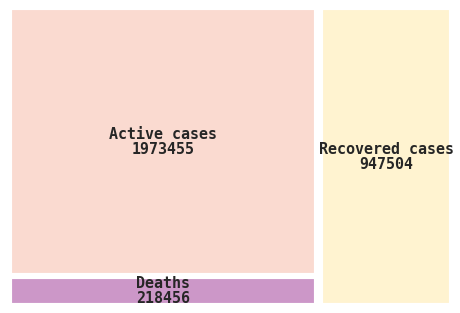

In [16]:
volume=[total_death_cases, total_active_cases, total_recovered_cases]

labels=['Deaths', 
        'Active cases',
        'Recovered cases']

color_list = ['#9B3192', '#F7B7A3', '#ffe9a3']

plt.rc('font', size=15, family='monospace', weight='bold')

squarify.plot(sizes= volume,label=labels,color=color_list, alpha=0.5, pad='True', value=volume)

plt.rcParams['figure.figsize']=(15,10)
plt.axis('off')
plt.show()



There are a couple of reasons that we have people who fall under confirmed cases but do not fall into the recovered, active or death statuses. 

These are the case statuses according to [WHO](https://www.who.int/publications-detail/global-surveillance-for-human-infection-with-novel-coronavirus-(2019-ncov)). 

|Case type | Case Definition|
|----------|----------------|
|Confirmed case | A person with laboratory confirmation of 2019-nCoV infection, irrespective of clinical signs and symptoms |
|Probable case |A person whose testing for the COVID-19 virus is inconclusive or could not be performed for any reason.|
|Suspect case | A patient with acute respiratory illness (fever and at least one sign/symptom of respiratory disease, e.g., cough, shortness of breath), AND a history of travel to or residence in a location reporting community transmission of COVID-19 disease during the 14 days prior to symptom onset OR A patient with any acute respiratory illness AND having been in contact with a confirmed or probable COVID-19 case in the last 14 days prior to symptom onset OR A patient with severe acute respiratory illness (fever and at least one sign/symptom of respiratory disease, e.g., cough,shortness of breath; AND requiring hospitalization) AND in the absence of an alternative diagnosis that fully explains the clinical presentation. |
|Contact case | A contact is a person who experienced any one of the following exposures during the 2 days before and the 14 days after the onset of symptoms of a probable or confirmed case |

### 2.2 Another way to visualise..which is better?

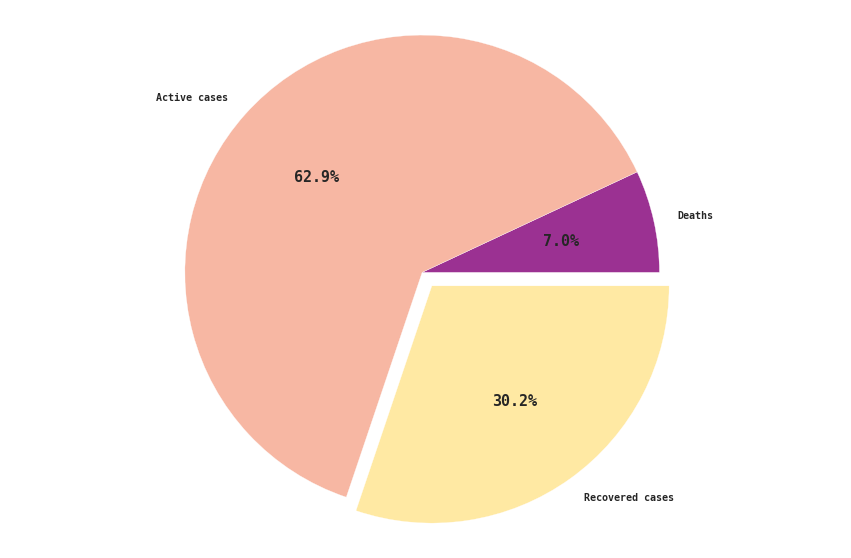

In [17]:
sizes=[total_death_cases, total_active_cases, total_recovered_cases]

labels=['Deaths', 
        'Active cases',
        'Recovered cases']

colors=['#9B3192', '#F7B7A3', '#ffe9a3','#EA5F89']

p = plt.pie(sizes, labels=labels, explode=(0, 0, 0.07), autopct='%1.1f%%', startangle=0, colors=colors)
plt.axis('equal')
            
plt.show()


## 3. Analysing the hardest hit countries

In [18]:
#nlargest is like the ORDER BY.....DESC... Function in SQL

most_hit=country_df.nlargest(10,['confirmed', 'deaths'])
most_hit

country          last_update        lat       long_  confirmed  \
17               US  2020-04-29 13:32:26  40.000000 -100.000000    1013168   
160           Spain  2020-04-29 13:32:26  40.463667   -3.749220     236899   
10            Italy  2020-04-29 13:32:26  41.871900   12.567400     201505   
6            France  2020-04-29 13:32:26  46.227600    2.213700     169053   
16   United Kingdom  2020-04-29 13:32:26  55.000000   -3.000000     162350   
7           Germany  2020-04-29 13:32:26  51.165700   10.451500     160059   
172          Turkey  2020-04-29 13:32:26  38.963700   35.243300     114653   
13           Russia  2020-04-29 13:32:26  61.524000  105.318800      99399   
89             Iran  2020-04-29 13:32:26  32.427908   53.688046      93657   
3             China  2020-04-29 13:32:26  30.592800  114.305500      83940   

     deaths  recovered  active  incident_rate  people_tested  \
17    58368     115936  838864     307.517962            NaN   
160   24275     132929   79695     506.683990            NaN   
10    27359      68941  105205     333.276394            NaN   
6     23694      47775   97584     258.991733            NaN   
16    21745        813  139792     239.150915            NaN   
7      6314     120400   33345     191.037794            NaN   
172    2992      38809   72852     135.942931            NaN   
13      972      10286   88141      68.112083            NaN   
89     5957      73791   13909     111.505783            NaN   
3      4637      78455     848       5.975754            NaN   

     people_hospitalized  mortality_rate  uid iso3  
17                   NaN        5.760940  840  USA  
160                  NaN       10.246983  724  ESP  
10                   NaN       13.577331  380  ITA  
6                    NaN       14.015723  250  FRA  
16                   NaN       13.393902  826  GBR  
7                    NaN        3.944795  276  DEU  
172                  NaN        2.609613  792  TUR  
13                   NaN        0.977877  643  RUS  
89                   NaN        6.360443  364  IRN  
3                    NaN        5.524184  156  CHN

In [19]:
#sorted_values sorts
#DataFrame.sort_values(self, by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False)

sorted_country_df = country_df.sort_values('confirmed', ascending= False)

In [20]:
sorted_country_df

country          last_update        lat       long_  confirmed  \
17                 US  2020-04-29 13:32:26  40.000000 -100.000000    1013168   
160             Spain  2020-04-29 13:32:26  40.463667   -3.749220     236899   
10              Italy  2020-04-29 13:32:26  41.871900   12.567400     201505   
6              France  2020-04-29 13:32:26  46.227600    2.213700     169053   
16     United Kingdom  2020-04-29 13:32:26  55.000000   -3.000000     162350   
..                ...                  ...        ...         ...        ...   
135  Papua New Guinea  2020-04-29 13:32:26  -6.314993  143.955550          8   
116        Mauritania  2020-04-29 13:32:26  21.007900  -10.940800          8   
35             Bhutan  2020-04-29 13:32:26  27.514200   90.433600          7   
181    Western Sahara  2020-04-29 13:32:26  24.215500  -12.885800          6   
182             Yemen  2020-04-29 13:32:26  15.552727   48.516388          1   

     deaths  recovered  active  incident_rate  people_tested  \
17    58368     115936  838864     307.517962            NaN   
160   24275     132929   79695     506.683990            NaN   
10    27359      68941  105205     333.276394            NaN   
6     23694      47775   97584     258.991733            NaN   
16    21745        813  139792     239.150915            NaN   
..      ...        ...     ...            ...            ...   
135       0          0       8       0.089415            NaN   
116       1          6       1       0.172056            NaN   
35        0          5       2       0.907192            NaN   
181       0          5       1       1.004470            NaN   
182       0          1       0       0.003353            NaN   

     people_hospitalized  mortality_rate  uid iso3  
17                   NaN        5.760940  840  USA  
160                  NaN       10.246983  724  ESP  
10                   NaN       13.577331  380  ITA  
6                    NaN       14.015723  250  FRA  
16                   NaN       13.393902  826  GBR  
..                   ...             ...  ...  ...  
135                  NaN        0.000000  598  PNG  
116                  NaN       12.500000  478  MRT  
35                   NaN        0.000000   64  BTN  
181                  NaN        0.000000  732  ESH  
182                  NaN        0.000000  887  YEM  

[185 rows x 14 columns]

## 3.1 Automating with functions and adding interaction

In [21]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### What are some of the worst hit countries? 

My **definition** of worst hit countries is: Countries with the most confirmed cases
   

## 1. Confirmed cases

In [22]:
def worst_hit(n):
    n=int(n)
    return country_df.sort_values('confirmed',ascending=False).head(n)

interact(worst_hit, n=10)

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.worst_hit(n)>

In [128]:
def worst_hit_map(n):     
    fig = px.scatter_mapbox(sorted_country_df.head(n), lat="lat", lon="long_",hover_name="country", hover_data=["country", "confirmed", "deaths"], 
                        color_discrete_sequence=["#EA5F89"],zoom=1, height=500, size="confirmed")
    fig.update_layout(mapbox_style="carto-darkmatter")
    fig.update_layout(title=str(n) +" countries with the most confirmed COVID-19 cases")
    fig.update_layout(margin={"r":20,"t":30,"l":20,"b":20})
    fig.show()
    

interact(worst_hit_map, n=10)

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.worst_hit_map(n)>

In [24]:
def few_case_countries(r):
    n=int(r)
    return country_df.sort_values('confirmed', ascending=True).head(r)

interact(few_case_countries, r=10)

interactive(children=(IntSlider(value=10, description='r', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.few_case_countries(r)>

In [25]:
def least_hit_map(n):     
    fig = px.scatter_mapbox(sorted_country_df.tail(n), lat="lat", lon="long_", hover_name="country", hover_data=["country", "confirmed", "deaths"],
                        color_discrete_sequence=["#FFA600"],zoom=1, height=500, size="confirmed")
    fig.update_layout(mapbox_style="carto-darkmatter")
    fig.update_layout(title=str(n) +" countries with the least confirmed COVID-19 cases")
    fig.update_layout(margin={"r":20,"t":30,"l":20,"b":20})
    fig.show()

interact(least_hit_map, n=10)

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.least_hit_map(n)>

## 2. Incidence rates

In [26]:
sorted_deaths_df=country_df.sort_values('deaths', ascending= False)
sorted_recovered_df=country_df.sort_values('recovered', ascending= False)
sorted_active_df=country_df.sort_values('active', ascending= False)
sorted_incident_df=country_df.sort_values('incident_rate', ascending=False)

In [27]:
# FYI I had to install plotly for this and import it here
# import plotly.express as px
# This is an example that was shown on https://towardsdatascience.com/building-covid-19-analysis-dashboard-using-python-and-voila-ee091f65dcbb 

def incidence_bubble(i):
    fig=px.scatter(sorted_incident_df.head(i), x="country", y="confirmed", size="incident_rate", color="country",hover_name="country", size_max=60)
    fig.update_layout(
        title=str(i) +" countries with the highest incidence rates",
        xaxis_title="Countries",
        yaxis_title="Incident rate",
        width = 700
    )
    fig.show()

interact(incidence_bubble, i=10)


interactive(children=(IntSlider(value=10, description='i', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.incidence_bubble(i)>

## 3. Deaths

In [28]:
#Most deaths

def most_deaths(d):
    
    d=int(d)
    
    fig=px.bar(
    sorted_deaths_df.head(d),
    x = "country",
    y = "deaths",
    title= "Top " + str(d) + " countries with highest deaths", 
    color_discrete_sequence=["#EA5F89"], 
    height=500,
    width=800)
    
    fig.show()

interact(most_deaths, d=10) 

interactive(children=(IntSlider(value=10, description='d', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.most_deaths(d)>

## 4. Recoveries

In [29]:
#Most recovered cases

def most_recovered(r):
    
    r=int(r)
    
    fig=px.bar(
    sorted_recovered_df.head(r),
    x = "country",
    y = "recovered",
    title= "Top " + str(r) + " countries with the most recovered cases", 
    color_discrete_sequence=['#FFA600'], 
    height=500,
    width=800)
    
    fig.show()

interact(most_recovered, r=10) 

interactive(children=(IntSlider(value=10, description='r', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.most_recovered(r)>

In [30]:

def deaths_hit_map(w):     
    fig = px.scatter_mapbox(sorted_deaths_df.head(w), lat="lat", lon="long_", hover_name="country", hover_data=["country", "confirmed", "deaths"],
                        color_discrete_sequence=["#EA5F89"],zoom=1, height=500, size="deaths")
    fig.update_layout(mapbox_style="carto-darkmatter")
    fig.update_layout(title=str(w) +" countries with the most reported COVID-19 death cases")
    fig.update_layout(margin={"r":20,"t":30,"l":20,"b":20})
    fig.show()

interact(deaths_hit_map, w=10)



interactive(children=(IntSlider(value=10, description='w', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.deaths_hit_map(w)>

In [69]:
germany_deaths = death_df[death_df['country'] == "Germany"]

germany_deaths

state  country   lat  long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
120   NaN  Germany  51.0   9.0        0        0        0        0        0   

     1/27/20  ...  4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  4/24/20  \
120        0  ...     4586     4862     5033     5279     5575     5760   

     4/25/20  4/26/20  4/27/20  4/28/20  
120     5877     5976     6126     6314  

[1 rows x 102 columns]

In [123]:
def plot_cases_of_a_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [confirmed_df, death_df]
    
    fig = go.Figure()
    
    #we want access to the index of each element within the body of the loop
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 25:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 25:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,25:]),axis = 0)
            
        fig.add_trace(go.Scatter(
            x=x_data, 
            y=y_data, 
            mode='lines+markers',
            name=labels[i],
            line=dict(color=colors[i], 
            width=line_size[i]),
            connectgaps=True,
            text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ))
    
    fig.update_layout(
        title="COVID 19 cases of " + country,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 800,
        
    )
    
    fig.update_yaxes(type="linear")
    fig.show()
    
interact(plot_cases_of_a_country, country="Kenya")
    

interactive(children=(Text(value='Kenya', description='country'), Output()), _dom_classes=('widget-interact',)…

<function __main__.plot_cases_of_a_country(country)>

In [112]:
# women_countries= ["Norway", "Finland", "Denmark","Taiwan", "New Zealand", "Iceland", "Germany" ]

wd1= death_df[(death_df['country'] == "Denmark") | 
         (death_df['country'] == "Norway") | 
         (death_df['country'] == "Finland")| 
         (death_df['country'] == "Iceland")| 
         (death_df['country'] == "US")| 
         (death_df['country'] == "Germany")]

wd1= wd1.drop(columns=['lat', 'long'])


state  country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
92   Faroe Islands  Denmark        0        0        0        0        0   
93       Greenland  Denmark        0        0        0        0        0   
94             NaN  Denmark        0        0        0        0        0   
106            NaN  Finland        0        0        0        0        0   
120            NaN  Germany        0        0        0        0        0   
130            NaN  Iceland        0        0        0        0        0   
175            NaN   Norway        0        0        0        0        0   
225            NaN       US        0        0        0        0        0   

     1/27/20  1/28/20  1/29/20  ...  4/19/20  4/20/20  4/21/20  4/22/20  \
92         0        0        0  ...        0        0        0        0   
93         0        0        0  ...        0        0        0        0   
94         0        0        0  ...      355      364      370      384   
106        0        0        0  ...       94       98      141      149   
120        0        0        0  ...     4586     4862     5033     5279   
130        0        0        0  ...        9       10       10       10   
175        0        0        0  ...      165      181      182      187   
225        0        0        0  ...    40945    42659    45086    47412   

     4/23/20  4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  
92         0        0        0        0        0        0  
93         0        0        0        0        0        0  
94       394      403      418      422      427      434  
106      172      177      186      190      193      199  
120     5575     5760     5877     5976     6126     6314  
130       10       10       10       10       10       10  
175      194      199      201      201      205      206  
225    49724    51493    53755    54881    56259    58355  

[8 rows x 100 columns]

In [85]:
#Drop some columns in this dataframe to create a dataframe with only dates and countries. 
v2_death_df=death_df.drop(columns=['lat', 'long','state'])
v2_death_df

#Create data for the x axis which is the constant column dates, minus the first column 'country'


def lines_chart_plot(country):

dates = (list(v2_death_df.columns))[1:]

    for row in v2_death_df:
        if country== row[1]:
            label='country'
            x_data=dates
            y_data=list(v2_d)
    
    
    

country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0              Afghanistan        0        0        0        0        0   
1                  Albania        0        0        0        0        0   
2                  Algeria        0        0        0        0        0   
3                  Andorra        0        0        0        0        0   
4                   Angola        0        0        0        0        0   
..                     ...      ...      ...      ...      ...      ...   
259                 France        0        0        0        0        0   
260            South Sudan        0        0        0        0        0   
261         Western Sahara        0        0        0        0        0   
262  Sao Tome and Principe        0        0        0        0        0   
263                  Yemen        0        0        0        0        0   

     1/27/20  1/28/20  1/29/20  1/30/20  ...  4/19/20  4/20/20  4/21/20  \
0          0        0        0        0  ...       33       36       36   
1          0        0        0        0  ...       26       26       26   
2          0        0        0        0  ...      375      384      392   
3          0        0        0        0  ...       36       37       37   
4          0        0        0        0  ...        2        2        2   
..       ...      ...      ...      ...  ...      ...      ...      ...   
259        0        0        0        0  ...        0        0        0   
260        0        0        0        0  ...        0        0        0   
261        0        0        0        0  ...        0        0        0   
262        0        0        0        0  ...        0        0        0   
263        0        0        0        0  ...        0        0        0   

     4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  
0         40       42       43       47       50       57       58  
1         27       27       27       27       28       28       30  
2        402      407      415      419      425      432      437  
3         37       37       40       40       40       40       41  
4          2        2        2        2        2        2        2  
..       ...      ...      ...      ...      ...      ...      ...  
259        0        0        0        0        0        0        0  
260        0        0        0        0        0        0        0  
261        0        0        0        0        0        0        0  
262        0        0        0        0        0        0        0  
263        0        0        0        0        0        0        0  

[264 rows x 99 columns]